# Quickstart

*This page follows fastai's [quickstart page](https://docs.fast.ai/quick_start.html) by quickly showing a few learning tasks. More will be added here as they are added to the library.*

FastAI.jl's learning tasks all use the same basic steps and code:

- create a [data container](../docs/data_containers.md)
- create a learning method
- create learner
- call a *fit* method
- make predictions or view results

In this quick start, we'll show these steps for a wide range of difference applications and datasets. As you'll see, the code in each case is extremely similar, despite the very different models and data being used.

In [1]:
]activate

  Activating environment at `~/.julia/environments/v1.6/Project.toml`


In [2]:
using FastAI, Metalhead
import CairoMakie

┌ Info: Precompiling FastAI [5d0beca9-ade8-49ae-ad0b-a3cf890e669f]
└ @ Base loading.jl:1342
┌ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
└ @ Base loading.jl:1342


## Computer vision 

### Classification 

#### Single-label 

In [7]:
data, blocks = loaddataset("imagenette2-320", (Image, Label))
method = ImageClassificationSingle(blocks, size=(256, 256))
learner = methodlearner(method, data, Models.xresnet18(), ToGPU(), Metrics(accuracy))
fitonecycle!(learner, 5, 0.033)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:53


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   1.0 │ 2.02183 │  0.38533 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 1 ValidationPhase(): 100%|████████████████████████| Time: 0:00:04


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   1.0 │ 1.64177 │  0.44512 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:53


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   2.0 │ 1.35614 │  0.55944 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 2 ValidationPhase(): 100%|████████████████████████| Time: 0:00:03


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   2.0 │ 1.67969 │  0.50621 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:53


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   3.0 │ 1.03822 │  0.66455 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 3 ValidationPhase(): 100%|████████████████████████| Time: 0:00:03


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   3.0 │ 0.80063 │  0.74258 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:54


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   4.0 │ 0.76774 │     0.75 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 4 ValidationPhase(): 100%|████████████████████████| Time: 0:00:03


┌─────────────────┬───────┬────────┬──────────┐
│           Phase │ Epoch │   Loss │ Accuracy │
├─────────────────┼───────┼────────┼──────────┤
│ ValidationPhase │   4.0 │ 1.3687 │  0.80708 │
└─────────────────┴───────┴────────┴──────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:53


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   5.0 │ 0.54555 │  0.82826 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 5 ValidationPhase(): 100%|████████████████████████| Time: 0:00:03


┌─────────────────┬───────┬────────┬──────────┐
│           Phase │ Epoch │   Loss │ Accuracy │
├─────────────────┼───────┼────────┼──────────┤
│ ValidationPhase │   5.0 │ 0.6399 │  0.83298 │
└─────────────────┴───────┴────────┴──────────┘


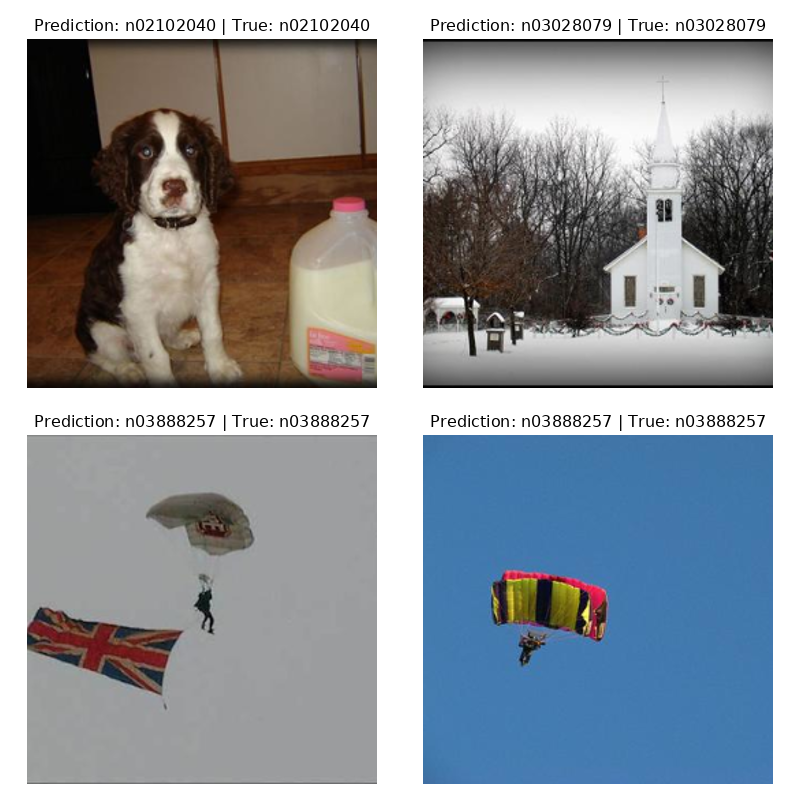

In [9]:
plotpredictions(method, learner)

#### Multi-label classification 

In [10]:
data, blocks = loaddataset("pascal_2007", (Image, LabelMulti))
method = ImageClassificationMulti(blocks)
learner = methodlearner(method, data, Models.xresnet18(), ToGPU(), Metrics(accuracy_thresh))
fitonecycle!(learner, 5)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:15


┌───────────────┬───────┬─────────┬─────────────────┐
│         Phase │ Epoch │    Loss │ Accuracy_thresh │
├───────────────┼───────┼─────────┼─────────────────┤
│ TrainingPhase │   1.0 │ 0.32584 │         0.88925 │
└───────────────┴───────┴─────────┴─────────────────┘


Epoch 1 ValidationPhase(): 100%|████████████████████████| Time: 0:00:03


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   1.0 │ 0.27929 │           0.912 │
└─────────────────┴───────┴─────────┴─────────────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:09


┌───────────────┬───────┬─────────┬─────────────────┐
│         Phase │ Epoch │    Loss │ Accuracy_thresh │
├───────────────┼───────┼─────────┼─────────────────┤
│ TrainingPhase │   2.0 │ 0.27966 │          0.9159 │
└───────────────┴───────┴─────────┴─────────────────┘


Epoch 2 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   2.0 │ 1.49307 │         0.91401 │
└─────────────────┴───────┴─────────┴─────────────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:09


┌───────────────┬───────┬────────┬─────────────────┐
│         Phase │ Epoch │   Loss │ Accuracy_thresh │
├───────────────┼───────┼────────┼─────────────────┤
│ TrainingPhase │   3.0 │ 0.2593 │         0.91885 │
└───────────────┴───────┴────────┴─────────────────┘


Epoch 3 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   3.0 │ 13.1969 │         0.91442 │
└─────────────────┴───────┴─────────┴─────────────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:09


┌───────────────┬───────┬─────────┬─────────────────┐
│         Phase │ Epoch │    Loss │ Accuracy_thresh │
├───────────────┼───────┼─────────┼─────────────────┤
│ TrainingPhase │   4.0 │ 0.24161 │          0.9206 │
└───────────────┴───────┴─────────┴─────────────────┘


Epoch 4 ValidationPhase(): 100%|████████████████████████| Time: 0:00:00


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   4.0 │ 8.41534 │         0.91759 │
└─────────────────┴───────┴─────────┴─────────────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:09


┌───────────────┬───────┬────────┬─────────────────┐
│         Phase │ Epoch │   Loss │ Accuracy_thresh │
├───────────────┼───────┼────────┼─────────────────┤
│ TrainingPhase │   5.0 │ 0.2304 │         0.92235 │
└───────────────┴───────┴────────┴─────────────────┘


Epoch 5 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   5.0 │ 14.5325 │         0.91657 │
└─────────────────┴───────┴─────────┴─────────────────┘


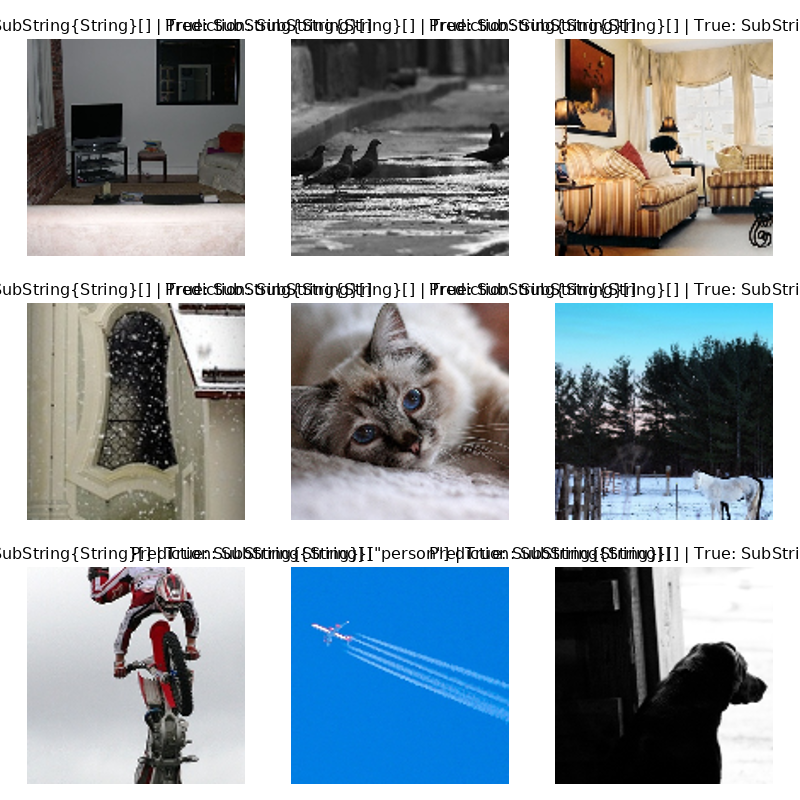

In [12]:
plotpredictions(method, learner, n = 9)

### Segmentation 

In [ ]:
data, blocks = loaddataset("camvid_tiny", (Image, Mask))
method = ImageSegmentation(blocks)
learner = methodlearner(method, data, Models.xresnet18(), ToGPU())
fitonecycle!(learner, 5, 0.033)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:27


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   1.0 │ 3.35306 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬───────────┐
│           Phase │ Epoch │      Loss │
├─────────────────┼───────┼───────────┤
│ ValidationPhase │   1.0 │ 2.16248e5 │
└─────────────────┴───────┴───────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   2.0 │ 2.92165 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   2.0 │ 3.61275 │
└─────────────────┴───────┴─────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   3.0 │ 2.43039 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   3.0 │ 2.71496 │
└─────────────────┴───────┴─────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   4.0 │ 2.10875 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   4.0 │ 2.47236 │
└─────────────────┴───────┴─────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   5.0 │ 2.04041 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   5.0 │ 2.25109 │
└─────────────────┴───────┴─────────┘


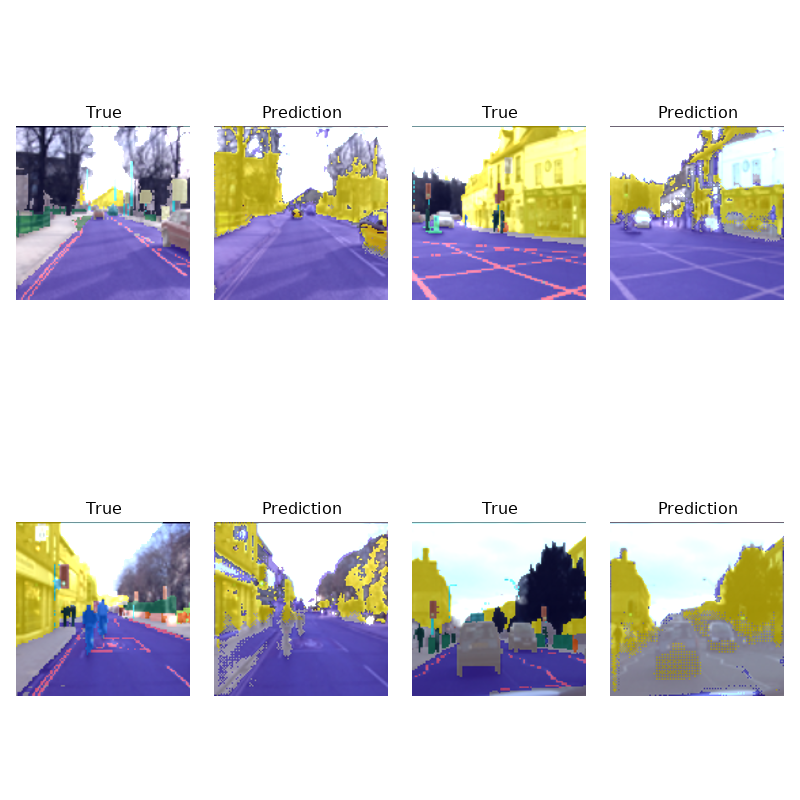

In [15]:
plotpredictions(method, learner)